In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [26]:
# Load data from scikit-learn datasets

data = load_breast_cancer(as_frame = True)
df = data['frame']
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [27]:
# Change the target number to 1 = positive, malignant cancer and 0 = negative, benign/no cancer
res = {1:0, 0:1}
df['target'] = df['target'].map(res)
original_df = df
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


<Axes: xlabel='target', ylabel='count'>

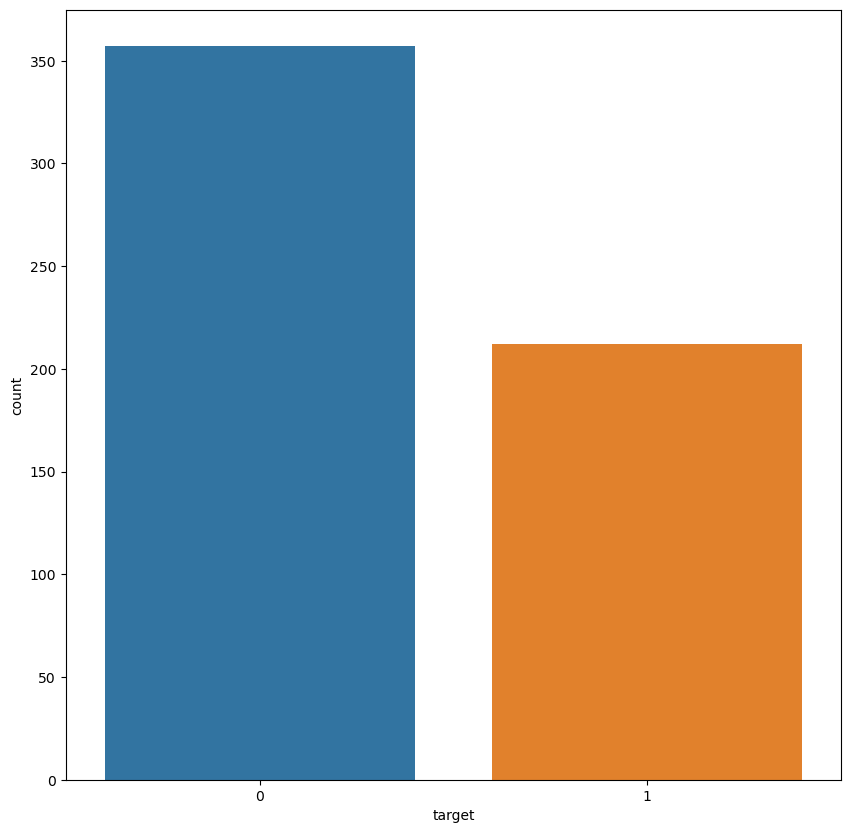

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#benign = 0 
sns.countplot(x='target',data=df)

In [29]:
""" 
Feature values range from zero to thousands. To achieve better performance, 
We normalize the data with min-max scaling. 
After normalization, the feature values range between 0 and 1. 

"""

names = df.columns[0:31]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

df = scaled_df

df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0


In [30]:
df.iloc[:, -1] = df.iloc[:, -1].astype(int)
df.head(3)

C:\Users\antsu\AppData\Local\Temp\ipykernel_14648\4241616369.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = df.iloc[:, -1].astype(int)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1


In [31]:
#split the data into training, validation, and test set
#Note: if using a larger dataset this should be done more efficiently, for example numpy split function

#leave cancer_test to wait for the model results

rnd_split = 4   # random state

# Use the ratio of 60%, 20% and 20% for the training, validation, and test sets respectively
my_train_size = 0.80
my_val_size = 0.25
cancer_trainval, cancer_test = train_test_split(df, train_size = my_train_size, random_state = rnd_split)

#split trainval again into train and val to get ratio 60/20/20
cancer_train, cancer_val = train_test_split(cancer_trainval, test_size = my_val_size, random_state = rnd_split)


cancer_train.info()
cancer_test.info()
cancer_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 22 to 406
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              341 non-null    float64
 1   mean texture             341 non-null    float64
 2   mean perimeter           341 non-null    float64
 3   mean area                341 non-null    float64
 4   mean smoothness          341 non-null    float64
 5   mean compactness         341 non-null    float64
 6   mean concavity           341 non-null    float64
 7   mean concave points      341 non-null    float64
 8   mean symmetry            341 non-null    float64
 9   mean fractal dimension   341 non-null    float64
 10  radius error             341 non-null    float64
 11  texture error            341 non-null    float64
 12  perimeter error          341 non-null    float64
 13  area error               341 non-null    float64
 14  smoothness error         

 Model 1: Decision tree

In [32]:
#Decision tree fitting
tree = DecisionTreeClassifier(random_state = 5)
trained = tree.fit(cancer_train.iloc[:, :-1], cancer_train['target'])

depth = tree.get_depth()
nr_leaves = tree.get_n_leaves()
print("Depth:", depth)
print("Number of leaves:", nr_leaves)

predicted = tree.predict(cancer_val.iloc[:, :-1])
actual = np.array(cancer_val.iloc[:, -1])


Depth: 5
Number of leaves: 13


0-1 loss: 0.052631578947368474


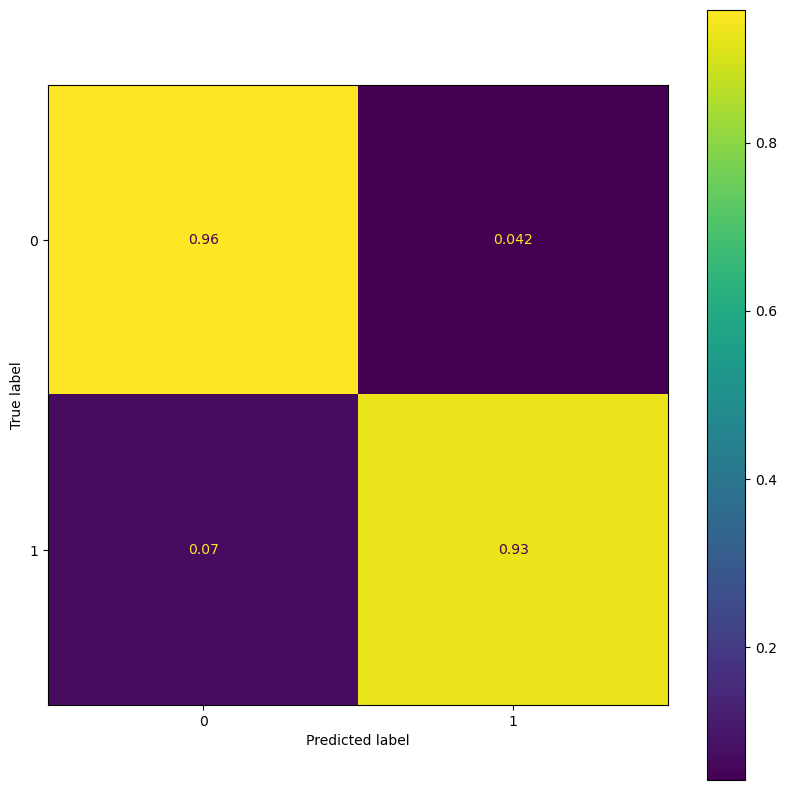

In [33]:
cm = confusion_matrix(actual, predicted, sample_weight=None, normalize='true')

val_error = zero_one_loss(actual, predicted)
print("0-1 loss:",val_error)

ConfusionMatrixDisplay(cm).plot();

In [34]:
#training error

predicted_train = tree.predict(cancer_train.iloc[:, :-1])
actual_train = np.array(cancer_train.iloc[:, -1])

cm = confusion_matrix(actual_train, predicted_train, sample_weight=None, normalize='true')
print(cm)

train_error = zero_one_loss(actual_train, predicted_train)
print("0-1 loss:",train_error)

[[1. 0.]
 [0. 1.]]
0-1 loss: 0.0


In [35]:
""" 
Training error is zero, so the model is likely overfitting.
Let's try to improve the model.

"""
# use information gain instead of gini impurity
tree = DecisionTreeClassifier(random_state = 5, criterion = 'entropy')
clf=tree.fit(cancer_train.iloc[:, :-1], cancer_train['target'])

depth = tree.get_depth()
nr_leaves = tree.get_n_leaves()
print(depth)
print(nr_leaves)

predicted = tree.predict(cancer_val.iloc[:, :-1])
actual = np.array(cancer_val.iloc[:, -1])

val_error = zero_one_loss(actual, predicted)
print("0-1 loss:",val_error)

predicted_train = tree.predict(cancer_train.iloc[:, :-1])
actual_train = np.array(cancer_train.iloc[:, -1])
train_error = zero_one_loss(actual_train, predicted_train)
print("0-1 loss:",train_error)

6
13
0-1 loss: 0.052631578947368474
0-1 loss: 0.0


In [36]:
#plot_tree(clf) 
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error','fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension']
text = export_text(clf, feature_names = features)
print(text)

|--- worst area <= 0.17
|   |--- worst concave points <= 0.45
|   |   |--- area error <= 0.08
|   |   |   |--- smoothness error <= 0.05
|   |   |   |   |--- worst compactness <= 0.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- worst compactness >  0.17
|   |   |   |   |   |--- class: 1
|   |   |   |--- smoothness error >  0.05
|   |   |   |   |--- class: 0
|   |   |--- area error >  0.08
|   |   |   |--- concavity error <= 0.14
|   |   |   |   |--- class: 1
|   |   |   |--- concavity error >  0.14
|   |   |   |   |--- class: 0
|   |--- worst concave points >  0.45
|   |   |--- mean texture <= 0.37
|   |   |   |--- mean symmetry <= 0.42
|   |   |   |   |--- class: 0
|   |   |   |--- mean symmetry >  0.42
|   |   |   |   |--- compactness error <= 0.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- compactness error >  0.25
|   |   |   |   |   |--- mean area <= 0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mean area >  0.13
|   |   |   |   |   |   

In [37]:
#let's try to find a reasonable maximum depth

i = 1

while i < 10:
    print("#",i)
    
    tree = DecisionTreeClassifier(random_state = 5, criterion = 'gini', max_depth = i, min_samples_leaf = 1)
    fitted=tree.fit(cancer_train.iloc[:, :-1], cancer_train['target'])

    depth = tree.get_depth()
    nr_leaves = tree.get_n_leaves()
    print("Depth:", depth)
    print("Number of leaves:", nr_leaves)

    predicted = tree.predict(cancer_val.iloc[:, :-1])
    actual = np.array(cancer_val.iloc[:, -1])

    val_error = zero_one_loss(actual, predicted)
    print("0-1 loss validation:",val_error)

    predicted_train = tree.predict(cancer_train.iloc[:, :-1])
    actual_train = np.array(cancer_train.iloc[:, -1])
    train_error = zero_one_loss(actual_train, predicted_train)
    print("0-1 loss training:",train_error)
    print()

    f1 = f1_score(actual, predicted)
    print("F1-score:",f1)
    print()
    print(classification_report(actual, predicted))

    text = export_text(fitted, feature_names = features)
    print(text)
    
    i = i+1
    

# 1
Depth: 1
Number of leaves: 2
0-1 loss validation: 0.07894736842105265
0-1 loss training: 0.06451612903225812

F1-score: 0.8831168831168831

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.79      0.88        43

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114

|--- worst area <= 0.17
|   |--- class: 0
|--- worst area >  0.17
|   |--- class: 1

# 2
Depth: 2
Number of leaves: 4
0-1 loss validation: 0.06140350877192979
0-1 loss training: 0.035190615835777095

F1-score: 0.9156626506024096

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94    

Model 2: Logistic regression

In [38]:
logreg = LogisticRegression(random_state = 5, max_iter=1000)
logreg.fit(cancer_train.iloc[:, :-1], cancer_train['target'])

predicted_log_proba = logreg.predict_proba(cancer_val.iloc[:, :-1])
actual_log = np.array(cancer_val.iloc[:, -1])

val_err_log = log_loss(actual_log, predicted_log_proba)
print("validation error:", val_err_log)

train_predicted_log_proba = logreg.predict_proba(cancer_train.iloc[:, :-1])
train_actual_log = np.array(cancer_train.iloc[:, -1])

train_err_log = log_loss(train_actual_log, train_predicted_log_proba)
print("training error:", train_err_log)

# Predict the values 
predicted_log = logreg.predict(cancer_val.iloc[:, :-1])

print()
print(classification_report(actual_log, predicted_log))

f1 = f1_score(actual_log, predicted_log)
print("F1-score:",f1)


validation error: 0.14987386417362603
training error: 0.14760037080666488

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

F1-score: 0.951219512195122


In [39]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=5, shuffle = True)
cv_results = cross_val_score(logreg, cancer_train.iloc[:, :-1], cancer_train['target'], cv=kfold, scoring = 'f1')
print (cv_results.mean()*100, "%")
print('F1 score: %.3f' % cv_results.mean())

93.30154919816363 %
F1 score: 0.933


In [40]:
# We use grid search to find the best hyperparameters for the model
# Smaller C = stronger regularization

param_grid = {"C":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=kfold, scoring = 'f1', return_train_score = True)
logreg_fit = grid.fit(cancer_train.iloc[:, :-1], cancer_train['target'])
print(grid.best_score_*100, "%")
print(grid.best_params_)

best_logreg = grid.best_estimator_

96.77875992986351 %
{'C': 100.0}


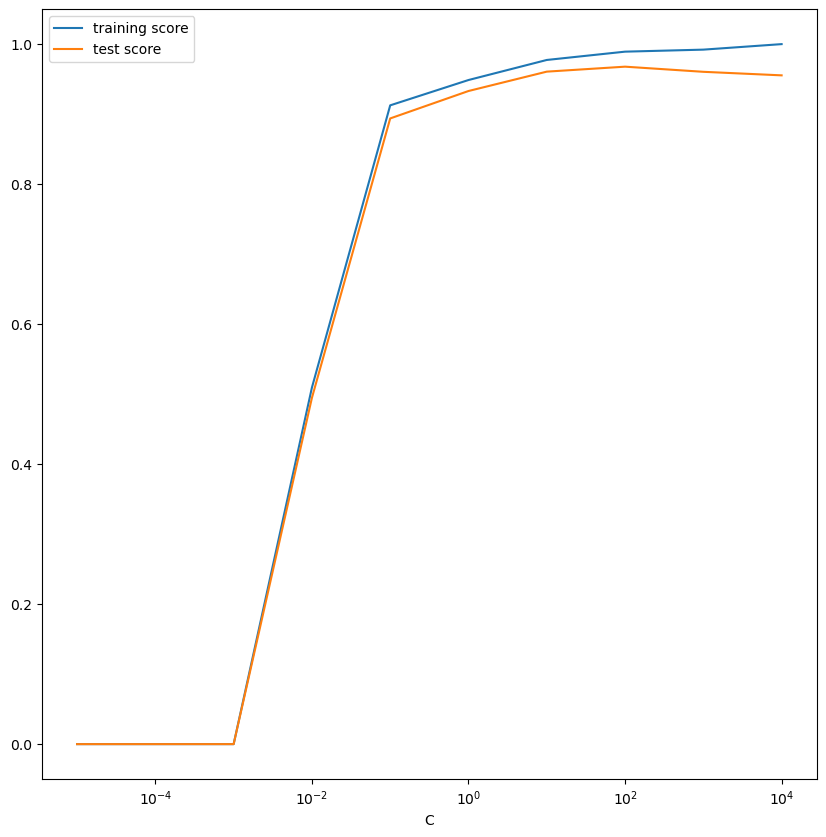

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)
from sklearn.model_selection import validation_curve

num_splits = 10
num_C_values = 10 
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
train_scores, valid_scores = validation_curve(logreg, cancer_train.iloc[:, :-1], cancer_train['target'], param_name='C', param_range=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], cv=kfold, scoring = 'f1')
train_scores = pd.DataFrame(data=train_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
valid_scores = pd.DataFrame(data=valid_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
plt.semilogx(C_values, train_scores.mean(axis=1), label='training score')
plt.semilogx(C_values, valid_scores.mean(axis=1), label='test score')
plt.xlabel('C')
plt.legend()

In [42]:
# Predict with the classifier found by gridsearch

log_final_predicted = best_logreg.predict(cancer_val.iloc[:, :-1])
log_final_actual = np.array(cancer_val['target'])

log_final_train_predicted = best_logreg.predict(cancer_train.iloc[:, :-1])
log_final_train_actual = np.array(cancer_train['target'])

log_final_proba = best_logreg.predict_proba(cancer_val.iloc[:, :-1])
log_final_train_proba = best_logreg.predict(cancer_train.iloc[:, :-1])

validation_loss = log_loss(log_final_actual, log_final_proba)
print("validation error:", validation_loss)

train_loss = log_loss(log_final_train_actual, log_final_train_proba)
print("training error:", train_loss)
print()
print(classification_report(log_final_actual, log_final_predicted))

f1 = f1_score(log_final_actual, log_final_predicted)
print("F1-score:",f1)

validation error: 0.06435595759780469
training error: 0.2113997266223882

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

F1-score: 0.963855421686747


F1 score is higher than for the previous logreg, but training error is larger than validation error.

This might happen because of the regularization, small sample sizes, or some kind of imbalance in test and training sets.  
Therefore, we choose the previous logistic regression model as our final model. 

In [43]:
#evaluate the final logistic regression model
log_final_test_predicted = logreg.predict(cancer_test.iloc[:, :-1])
log_final_test_actual = np.array(cancer_test['target'])

log_final_test_proba = logreg.predict_proba(cancer_test.iloc[:, :-1])

test_loss = log_loss(log_final_test_actual, log_final_test_proba)
print("Test error:", test_loss)
print()
print(classification_report(log_final_test_actual, log_final_test_predicted))

f1 = f1_score(log_final_test_actual, log_final_test_predicted)
print("F1-score:",f1)

Test error: 0.13305180732939806

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        80
           1       0.94      0.97      0.96        34

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

F1-score: 0.9565217391304348


In [44]:
#evaluate the final Decision tree, with max depth = 4

final_tree = DecisionTreeClassifier(random_state = 5, criterion = 'gini', max_depth = 4, min_samples_leaf = 1)
final_fitted=final_tree.fit(cancer_train.iloc[:, :-1], cancer_train['target'])

final_predicted = final_tree.predict(cancer_test.iloc[:, :-1])
final_actual = np.array(cancer_test['target'])

test_error = zero_one_loss(final_actual, final_predicted)
print("0-1 loss test:",test_error)

print()
print(classification_report(final_actual, final_predicted))

f1 = f1_score(final_actual, final_predicted)
print("F1-score:",f1)

0-1 loss test: 0.0964912280701754

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        80
           1       0.78      0.94      0.85        34

    accuracy                           0.90       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.92      0.90      0.91       114

F1-score: 0.8533333333333334


Conclusions:
- Logistic regression model was more accurate than decision tree model.
- Based on the test error and F1-score, there is room for improvement. When diagnosing cancer, we want the accuracy of the predictions to be close to 100%. 
- Feature selection could be done to improve model performance and generalization. 